# Finding The Most Promising Markets For Computer Science E-Learning
## Author: Salvatore Porcheddu
## Date: 2021-04-27

# Introduction

E-learning companies are more and more common in our historical time, thanks to the growing availability and speed of internet connections. 

The COVID-19 pandemic also [contributed to their growth](https://www.weforum.org/agenda/2020/04/coronavirus-education-global-covid19-online-digital-learning/), since in-person classes had to be suspended worldwide to prevent the spread of the disease: this also highlighted several advantages of online learning over traditional learning, namely an increased retention of information and a higher time efficiency compared to traditional classes.

One of the many education areas where e-learning shines is **programming**, given the high demand of computer science skills that traditional university courses are not always able to handle, especially in highly innovative fields like **data science**.

Assuming that we have an e-learning company that offers courses on programming, ranging from software development to data science and game development with a **subscription model at a price set to 59 dollars per month**, and that we want to promote our products with advertising, **what markets should we advertise our courses in**?
This is the question that we will try to answer in this project.

# The Data

To investigate and answer our question, we could employ surveys for different markets and find out this way what the best choices for advertising are. However, this would be too expensive and time-consuming for our purposes.

As a consequence, we will turn our attention to data that is already available, in particular, we will make use of the freeCodeCamp's [2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969): [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers a wide range of programming courses; thousands of people responded to the survey, which aimed to get a glimpse of how people are learning to code.

Let's start by reading the data, which is publicly available in a [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey):

In [15]:
import pandas as pd
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 100)

survey_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

print("the data set has {} rows and {} columns".format(survey_data.shape[0], survey_data.shape[1]))

survey_data.head()

the data set has 18175 rows and 136 columns


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Analysis: the interests

For the purpose of our analysis, the first thing we would like to know is whether people are interested in the courses we have to offer: the column `JobRoleInterest` contains an indication of what job role(s) people would like to be working in, and as such analyzing it can tell us if our courses are in demand or not.

We also want to know the locations with the largest number of potential new programmers as well as the amount of money that these people are willing to spend in order to learn to code. The survey data actually contains information to answer these two questions as well, as we will soon see.

First, let's focus on analyzing the `JobRoleInterest` column by creating a frequency table and looking for correspondences between the interests and what we offer.

Full-Stack Web Developer                                                                                                                                                                                                                                     11.770595
  Front-End Web Developer                                                                                                                                                                                                                                     6.435927
  Data Scientist                                                                                                                                                                                                                                              2.173913
Back-End Web Developer                                                                                                                                                                                             

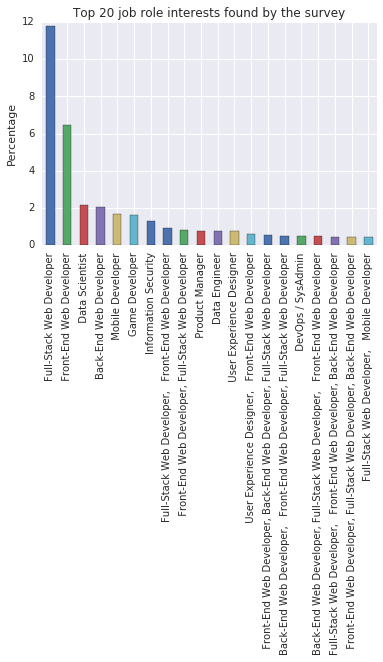

In [16]:
# creating the frequency distribution table with percentages and taking the top 20 values
role_interests = (survey_data["JobRoleInterest"].value_counts(normalize = True) * 100)
print(role_interests)

# plotting it
import matplotlib.pyplot as plt
%matplotlib inline

role_interests[:20].plot.bar()
plt.title("Top 20 job role interests found by the survey")
plt.ylabel("Percentage")
plt.show()

As we can see, full-stack and front-end web developers are the most requested job roles (with 11.77 and 6.44% of the responses respectively), followed by data scientist (2.13% of the responses); however, we can also see that many people expressed more than one preference, which distorts our results: we must isolate the single elements and then we can find out exactly how many people could be interested in the courses that we offer. 
For this analysis, we will also remove from our sample people that did not express any preference for the job role (i.e. people for which the `JobRoleInterest` column has a NaN value)

In [17]:
interests = survey_data.dropna(subset=["JobRoleInterest"]).copy()
print("After removing the null values we are left with {} observations.".format(interests.shape[0]))

# checking whether a person is interested in web development, mobile development, data science or game development
interests["interestedWebDeveloper"] = interests["JobRoleInterest"].str.contains("Web Developer", case=False)
interests["interestedMobileDeveloper"] = interests["JobRoleInterest"].str.contains("Mobile Developer", case=False)
interests["interestedDataScience"] = interests["JobRoleInterest"].str.contains("Data Scientist", case=False)
interests["interestedGameDeveloper"] = interests["JobRoleInterest"].str.contains("Game Developer", case=False)

After removing the null values we are left with 6992 observations.


The percentage of people interested to work as Web Developer is 82.62%
The percentage of people interested to work as Mobile Developer is 32.97%
The percentage of people interested to work as Data Scientist is 23.5%
The percentage of people interested to work as Game Developer is 23.28%


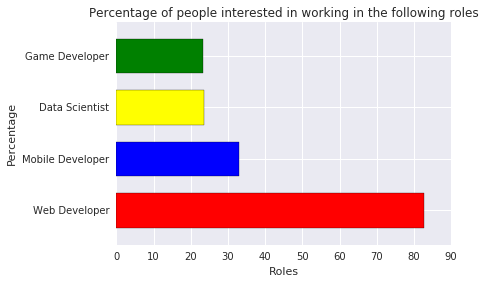

In [18]:
# calculating percentages of people potentially interested in our courses
interestedWebDeveloper = interests["interestedWebDeveloper"].mean() * 100
interestedMobileDeveloper = interests["interestedMobileDeveloper"].mean() * 100
interestedDataScience = interests["interestedDataScience"].mean() * 100
interestedGameDeveloper = interests["interestedGameDeveloper"].mean() * 100

single_interests = [interestedWebDeveloper, interestedMobileDeveloper, interestedDataScience, interestedGameDeveloper]
labels = ["Web Developer", "Mobile Developer", "Data Scientist", "Game Developer"]

for interest, label in zip(single_interests, labels):
    print("The percentage of people interested to work as {} is {}%".format(label, round(interest, 2)))
    
# plotting the results
plt.barh([0.10, 0.40, 0.70, 1.00], single_interests, height=0.2, color=["red", "blue", "yellow", "green"])
plt.ylim(0, 1.3)
plt.yticks([0.20, 0.50, 0.80, 1.10], labels)
plt.xlabel("Roles")
plt.ylabel("Percentage")
plt.title("Percentage of people interested in working in the following roles")
plt.show()

As we can see, about 82.62% of the surveyed people that expressed a job role preference would like to work as Web Developer, followed by about 33% for the Mobile Developer role, and about 23% for Game Developer and Data Scientist roles.

Let's also determine:

- how many people would be interested in working either as Web Developer or as Mobile Developer or both;
- the size of our global potential market by examining how many people would work in at least one of the four roles for which we offer courses

In [19]:
# checking whether a person is interested in either web or mobile development or both
interests["interestedWebOrMobileDev"] = interests["interestedWebDeveloper"] \
                                            | interests["interestedMobileDeveloper"]
interests["interestedBothWebMobileDev"] = interests["interestedWebDeveloper"] \
                                            & interests["interestedMobileDeveloper"]
    
# checking whether a person is interested in either web or mobile or game development or data science
interests["interested_global"] = (interests["interestedWebOrMobileDev"]) \
                                    | (interests["interestedDataScience"]) \
                                    | (interests["interestedGameDeveloper"])

# calculating the percentages of people interested
interestedWebOrMobileDev = interests["interestedWebOrMobileDev"].mean() * 100
interestedBothWebMobileDev = interests["interestedBothWebMobileDev"].mean() * 100
interested_global = interests["interested_global"].mean() * 100

print("The percentage of people interested in working either as Web Developer or Mobile Developer is {}%.".format(round(interestedWebOrMobileDev, 2)))
print("The percentage of people interested in working both as Web Developer or Mobile Developer is {}%.".format(round(interestedBothWebMobileDev, 2)))
print("{}% of people would potentially be interested in at least one of our courses.".format(round(interested_global, 2)))

The percentage of people interested in working either as Web Developer or Mobile Developer is 86.27%.
The percentage of people interested in working both as Web Developer or Mobile Developer is 29.32%.
93.35% of people would potentially be interested in at least one of our courses.


So, to recap, our analysis so far has shown that:

- 82.62% of people are potentially interested in our Web Development courses;
- about 33% of people could potentially be interested in our Mobile Development courses;
- 86.27% of people would potentially take either a Web Development or a Mobile Development course;
- 93.35% people would potentially take one of the courses we offer (including Game Development and Data Science courses)

Remember that we only included in the sample people who expressed a job role preference; if we had included all the people in the sample we would have obtained lower percentages.

Given these high percentages, we can safely say that this sample is representative of the population we are interested in, and we will therefore continue using it in the remainder of the analysis.

# Analysis: locations and densities

Now that we have gathered a sample in which 93% of people may have a potential interest in buying one of our courses, we need to determine the best markets to run the ads in, considering that the sample contains people from a multitude of countries.

Each country can be considered a separate market and we will select those with the largest number of potential customers as the most promising ones for our advertising campaign.

The column `CountryLive` contains the country in which each respondent lives (not that this may be different from the country of birth) and thus gives us the information we need. Let's analyse it with a frequency distribution table, this time with both absolute and relative frequences.

In [20]:
absolute_countries = interests["CountryLive"].value_counts()
relative_countries = interests["CountryLive"].value_counts(normalize=True)

print(absolute_countries, "\n" * 2, relative_countries)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Argentina   

Our data shows that the two biggest markets seem to be the USA and India, with 45.70% and 7.72% of people residing there respectively.

In general, we see that the four biggest markets (USA, India, UK, Canada) may all be appealing to us if we offer our courses in English, since all of them have English as their official language. Assuming this is the case, we will narrow down the analysis to only these four countries.

In [21]:
markets = ["United States of America", "India", "United Kingdom", "Canada"]
appealing_markets = interests[interests["CountryLive"].isin(markets)].copy()

print("We are left with {} people in our sample".format(appealing_markets.shape[0]))
appealing_markets.head()

We are left with 4228 people in our sample


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,interestedWebDeveloper,interestedMobileDeveloper,interestedDataScience,interestedGameDeveloper,interestedWebOrMobileDev,interestedBothWebMobileDev,interested_global
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,True,False,True
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02

# Analysis: willingness to spend

Now that we have four large and potentially appealing markets, we still need to take into account their members' willingness to spend: we have no use for a large market if most of its members are only willing to learn with free courses.

To determine the willingness to spend, we will create a new column by dividing the `MoneyForLearning` column, which tells us how much the person has spent for learning, with the `MonthsProgramming` column, which indicates how many months the student has been studying.

After that, we will remove any missing values from the new column and from the `CountryLive` column (we do not expect any missing value in this column since we have already filtered it but we will check to be sure) and then determine the average amount of money spent by country.

The first few rows of the `MoneyForLearning` and `MonthsProgramming` columns are as follows:

In [22]:
print(appealing_markets[["MoneyForLearning", "MonthsProgramming"]].head())
print("There are {} students that have just started learning and thus have indicated that they've been studying programming for 0.0 months.".format(appealing_markets[appealing_markets["MonthsProgramming"] == 0].shape[0]))

    MoneyForLearning  MonthsProgramming
1               80.0                6.0
2             1000.0                5.0
6                0.0               12.0
13               NaN                NaN
14               NaN                9.0
There are 150 students that have just started learning and thus have indicated that they've been studying programming for 0.0 months.


As we can see, the `MonthsProgramming` column contains 150 observations with a value of "0.0": since we cannot divide by zero, we will replace these values with 1:

In [23]:
appealing_markets["MonthsProgramming"] = appealing_markets["MonthsProgramming"].replace(0.0, 1.0)

# creating the new column that contains the amount spent per month
appealing_markets["MoneyForLearningPerMonth"] = appealing_markets["MoneyForLearning"] / appealing_markets["MonthsProgramming"]

# checking how many missing values are in the new column and in the CountryLive column
missing = appealing_markets[["CountryLive", "MoneyForLearningPerMonth"]].isna().sum()
print("Missing values:\n", missing)

# removing missing values
appealing_markets.dropna(subset=["CountryLive", "MoneyForLearningPerMonth"], inplace=True)
print("After removing missing values we have {} rows left.".format(appealing_markets.shape[0]))

Missing values:
 CountryLive                   0
MoneyForLearningPerMonth    313
dtype: int64
After removing missing values we have 3915 rows left.


In [24]:
# grouping data by country and calculating the mean amount spent
mean_spent_country = appealing_markets.groupby("CountryLive")["MoneyForLearningPerMonth"].mean()
print("The mean gives the following results:", mean_spent_country, "\n")

# grouping data by country and calculating the median amount spent
median_spent_country = appealing_markets.groupby("CountryLive")["MoneyForLearningPerMonth"].median()
print("The median gives the following results:", median_spent_country)

# calculating how many people actually do not spend anything at all
free_learners = appealing_markets[appealing_markets["MoneyForLearningPerMonth"] == 0].shape[0]
print("\n", "{} people only learn for free, which correspond to {:.2%} of the sample.".format(free_learners, free_learners / len(appealing_markets)))

The mean gives the following results: CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyForLearningPerMonth, dtype: float64 

The median gives the following results: CountryLive
Canada                      0.000000
India                       0.000000
United Kingdom              0.000000
United States of America    3.333333
Name: MoneyForLearningPerMonth, dtype: float64

 1844 people only learn for free, which correspond to 47.10% of the sample.


Our results show that the USA and India seem to be the best markets when considering the mean amount spent. However, these values do not seem completely reliable for the following reasons:

- We would expect India to come last, considering that it has a much lower GDP per capita than the other countries, but instead it comes before Canada and the UK;
- The median amount spent is incredibly low compared to the mean amount spent, being just a bit more than 3 dollars for the USA and 0 dollars for the other countries; this shows that most people do not actually spend anything or spend very little money for their learning, while a few of them spend a lot, which is skewing our results, and we can indeed see this conclusion confirmed by the fact that almost half of people in our sample spent nothing.

What we have just outlined suggests that we have a problem with extreme outliers that we need to address if we want to get reliable values.

To be completely sure that we do have outliers in our distribution, let's generate four box plots, one for each country:

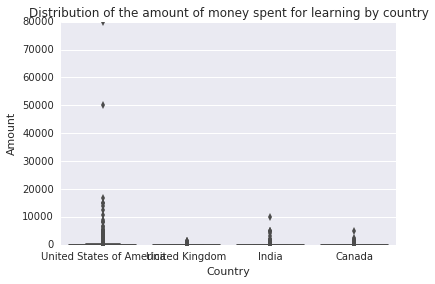

In [25]:
# we will use seaborn to plot the boxplots
import seaborn as sns

# disabling useless warnings
import warnings
warnings.filterwarnings("ignore")

# plotting the boxplots
sns.boxplot(x="CountryLive", y="MoneyForLearningPerMonth", data=appealing_markets)
plt.title("Distribution of the amount of money spent for learning by country")
plt.xlabel("Country")
plt.ylabel("Amount")

The boxplots confirm our suspicions: there are indeed many extreme outliers that skew our distributions and do not allow us to see how much money ordinary people actually spend. We will therefore proceed to remove the outliers, starting by only including values less than or equal to 5,000 dollars (which is still a very high value but more realistic than the previous maximum of about 80,000).

The mean now gives the following results: CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    138.982678
Name: MoneyForLearningPerMonth, dtype: float64 



(0, 5200)

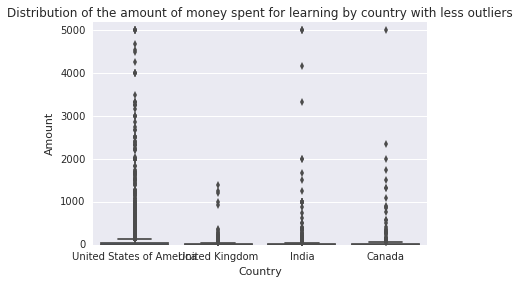

In [26]:
appealing_markets_no_outliers = appealing_markets[appealing_markets["MoneyForLearningPerMonth"] <= 5000].copy()

# grouping data by country and calculating the mean amount spent
mean_spent_no_outliers = appealing_markets_no_outliers.groupby("CountryLive")["MoneyForLearningPerMonth"].mean()
print("The mean now gives the following results:", mean_spent_no_outliers, "\n")

# plotting the data
sns.boxplot(x="CountryLive", y="MoneyForLearningPerMonth", data=appealing_markets_no_outliers)
plt.title("Distribution of the amount of money spent for learning by country with less outliers")
plt.xlabel("Country")
plt.ylabel("Amount")
plt.ylim(0, 5200)

The new boxplots still show a lot of outliers, but while in the US distribution the outliers tend to be closer to one another, we still have extreme outliers in the Indian and Canadian distribution: we will therefore manually remove any value greater than 2,000 from the Indian and Canada distributions and calculate the mean again:

The mean now gives the following results: CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    138.982678
Name: MoneyForLearningPerMonth, dtype: float64 

After removing the more extreme outliers, India comes after Canada but before the United Kingdom. We will thus assume that Indians indeed tend to spend more money to learn computer science subjects than the British, at least in our sample.


(0, 5200)

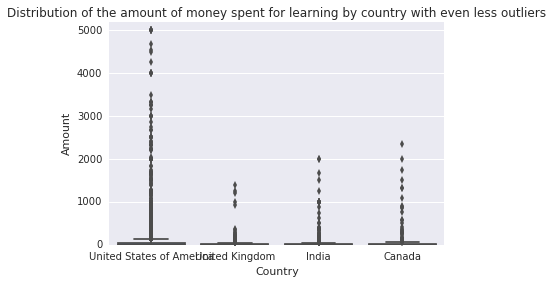

In [27]:
mask = ~((appealing_markets_no_outliers["CountryLive"].isin(["India", "Canada"])) & (appealing_markets_no_outliers["MoneyForLearningPerMonth"] > 3000))
appealing_markets_no_outliers = appealing_markets_no_outliers[mask].copy()

# grouping data by country and calculating the mean amount spent
mean_spent_no_outliers2 = appealing_markets_no_outliers.groupby("CountryLive")["MoneyForLearningPerMonth"].mean()
print("The mean now gives the following results:", mean_spent_no_outliers2, "\n")
print("After removing the more extreme outliers, India comes after Canada but before the United Kingdom. We will thus assume that Indians indeed tend to spend more money to learn computer science subjects than the British, at least in our sample.")

# plotting the data
sns.boxplot(x="CountryLive", y="MoneyForLearningPerMonth", data=appealing_markets_no_outliers)
plt.title("Distribution of the amount of money spent for learning by country with even less outliers")
plt.xlabel("Country")
plt.ylabel("Amount")
plt.ylim(0, 5200)

# Deciding the two best markets

After removing the more extreme outliers, it is quite clear that the USA is the best market to advertise our products in: the mean amount spent per month is more than double what our subscription fee would be, and higher than in the other countries.

Deciding the second best market is not so straightforward though: Canada has the second highest mean amount spent, but India has a way larger population. To aid us in our decision, let's determine how many people in Canada and in India spent at least 59 dollars, so that we can have an idea of what the bigger market is for our purposes:

In [28]:
customers_india = appealing_markets_no_outliers[(appealing_markets_no_outliers["CountryLive"] == "India") & (appealing_markets_no_outliers["MoneyForLearningPerMonth"] >= 59)].shape[0]
customers_canada = appealing_markets_no_outliers[(appealing_markets_no_outliers["CountryLive"] == "Canada") & (appealing_markets_no_outliers["MoneyForLearningPerMonth"] >= 59)].shape[0]

print("In Canada, {} people spent at least 59 dollars.\n".format(customers_canada))
print("In India, {} people spent at least 59 dollars.".format(customers_india))

In Canada, 39 people spent at least 59 dollars.

In India, 69 people spent at least 59 dollars.


As we can see, even though the mean amount spent is lower than the Canadian one, India is indeed a potentially bigger market for our courses than Canada, and so we should advertise our products in it; having said that, Canada is still an interesting market that should be taken into consideration, and given that it's very close to the USA, we could decide to merge the two markets and advertise our products in both of them.

When it comes to the advertising budget, we could:

- if we merge the US and Canada markets, assign 70% of the budget to this combined market and the remaining 30% to the Indian market;
- if we keep the USA and Canada markets separated, assign around 50% of the budget to the US, 30% to the Indian and 20% to the Canadian markets.

Although the US offers the most promising conditions for our company's success, we should not ignore the other two markets because they too offer interesting opportunities, especially India, which is growing rapidly and is a [BRICS country](https://en.wikipedia.org/wiki/BRICS).

Finally, we should present our results and leave the final decision of where to advertise and how to allocate the advertising budget to the marketing team of our company, if we have one.



# Conclusion

In this project we have shown that this is indeed a very promising historical time to start an e-learning company that offers computer science online courses.

While the growth trend of online learning will continue worldwide, we have found that our best bet right now is the US market, followed by the Indian and Canadian markets and thus these are the best markets to focus our advertising efforts to.